In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# The dataset
the data set used is winequality-red found in <a href="https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009">link</a>
It is a dataset where they determine the quality of a wine based on different features that it has

Features of the dataset

| name                 | type    | measure | description                                                                          |
|----------------------|---------|---------|--------------------------------------------------------------------------------------|
| fixed acidity        | float   | mg/L    | The predominant fixed acids found in wines are tartaric, malic, citric, and succinic |
| volatile acidity     | float   | g/L     |  a measure of the low molecular weight (or steam distillable) fatty acids in wine and is generally perceived as the odour of vinegar                                                                                 |
| citric acidity       | float   | g/L        | the acidity coming from citric acid                                                                                      |
| residual sugar       | float   |  g/L       | natural grape sugars leftover in a wine after the alcoholic fermentation finishes                                                                                     |
| chlorides            | float   |   g/L      |  salt content                                                                                    |
| free sulfur dioxide  | float   |  mg/l H2SO4   |   a measure of the amount of SO2 that is not bound to other molecules, and is used to calculate molecular SO2                                                                                   |
| total sulfur dioxide | float   |  mg/l H2SO4   |  a measure of the amount of SO2                                                                                    |
| density              | float   | Kg/L     | the mass/volume                                                                                     |
| pH                   | float   | pH       | the degree of acidity in ph scale                                                                                     |
| sulfates             | float   |   mg/L      |  naturally occurring compounds found in all wines; they act as a preservative by inhibiting microbial growth                                                                                    |
| alcohol              | float   | g/L     | amount of alcohol per liter                                                                                     |
| quality              | Natural | numeric | the measurement of quality                                                                                      |

information was obtain from:
Waterhouse Lab. (n.d.). Retrieved June 24, 2020, from https://waterhouse.ucdavis.edu/
https://archive.ics.uci.edu/ml/datasets/wine+quality

In [2]:
df=pd.read_csv('datasets_4458_8204_winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Clean indexes that contain NaN values

In [3]:
df=df.dropna()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Basic Statistics

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Identify Correlation between the data

In [5]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


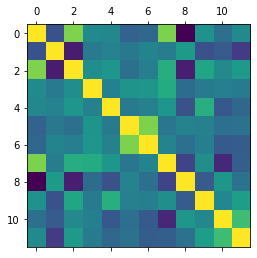

In [6]:
plt.matshow(df.corr())
plt.show()

### We want to use the features (fixed acidity,	volatile acidity,	citric acid,	residual sugar,	chlorides,	free sulfur dioxide,	total sulfur dioxide,	density,	pH,	sulphates,	alcohol) to determine the quality of the wine
we can see there ain´t many features with a strong correlation with quality so we are going to extract the correlations with that feature

In [7]:
corrQuality=df.corr().loc['quality']
corrQuality=abs(corrQuality)
corrQuality=corrQuality.sort_values(ascending=False)
corrQuality

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64

 we can see that the features that have the strongest correlation with quality are: alcohol, volatile acidity, and sulphates

### Alcohol Feature

In [8]:
df['alcohol'].describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

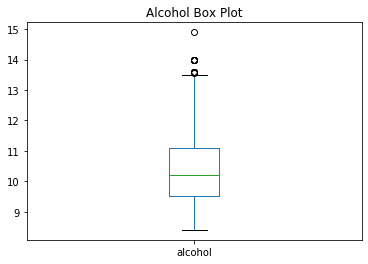

In [9]:
df['alcohol'].plot(kind='box',title='Alcohol Box Plot')

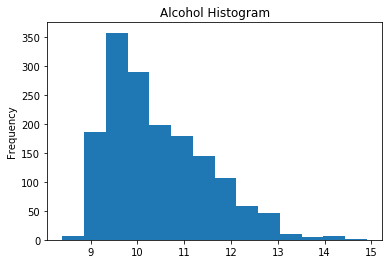

In [10]:
df['alcohol'].plot(kind='hist',title='Alcohol Histogram',bins=14)

We can se that the alcohol values are positively skewed and with the mean ~10g/L

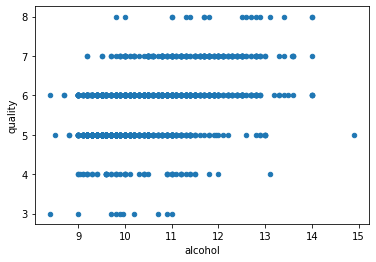

In [11]:
df.plot('alcohol','quality',kind='scatter')

neverless we still see too much noise in this graph, but we can see that as alcohol increases the quality of the wine also increases

### volatile acidity

In [12]:
df['volatile acidity'].describe()

count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

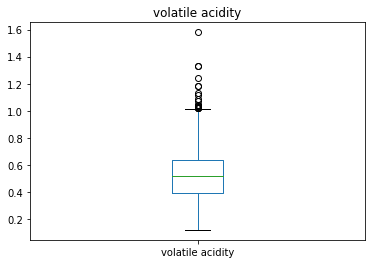

In [13]:
df['volatile acidity'].plot(kind='box',title='volatile acidity')

Here we can se there are more outliers than in the case of alcohol over then 90%

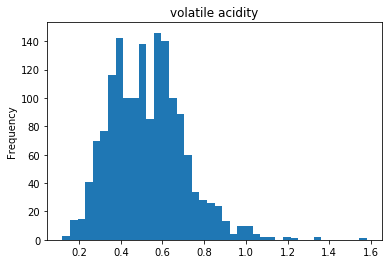

In [14]:
df['volatile acidity'].plot(kind='hist',title='volatile acidity',bins=40)

In this case we can see that there is also a positive distribution in this case

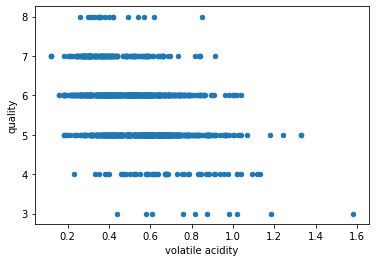

In [15]:
df.plot('volatile acidity','quality',kind='scatter')

In this case we still see too much noise in the graph, but the relation is inverse (as the acid volatility increases the quality decreases)

### Sulphates               

In [16]:
df['sulphates'].describe()

count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

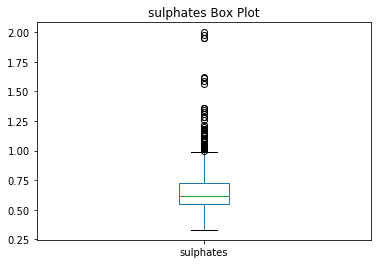

In [17]:
df['sulphates'].plot(kind='box',title='sulphates Box Plot')

In this case the amount of outliers is outstanding in comparison to the other 2 features

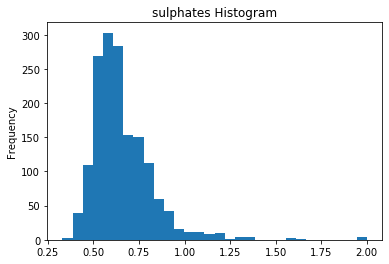

In [18]:
df['sulphates'].plot(kind='hist',title='sulphates Histogram',bins=30)

We can se that the alcohol values are positively skewed

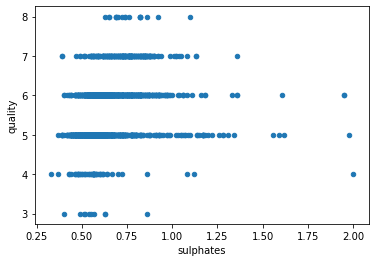

In [19]:
df.plot('sulphates','quality',kind='scatter')

In the case of this plot we can see a positive relation, more steep than the one of alcohol, but there is still too much noise in the graph

# See the data in an R^n space

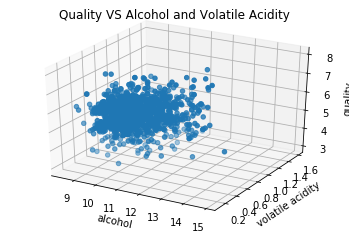

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['alcohol'], df['volatile acidity'],df['quality'])
ax.set_xlabel('alcohol')
ax.set_ylabel('volatile acidity')
ax.set_zlabel('quality')
plt.title('Quality VS Alcohol and Volatile Acidity')
plt.show()

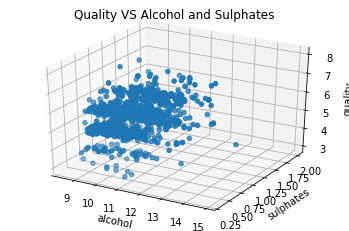

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['alcohol'], df['sulphates'],df['quality'])
ax.set_xlabel('alcohol')
ax.set_ylabel('sulphates')
ax.set_zlabel('quality')
plt.title('Quality VS Alcohol and Sulphates')
plt.show()

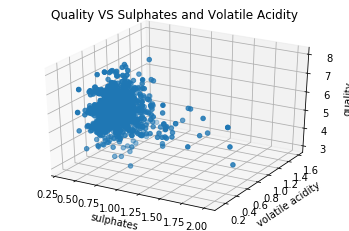

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['sulphates'], df['volatile acidity'],df['quality'])
ax.set_xlabel('sulphates')
ax.set_ylabel('volatile acidity')
ax.set_zlabel('quality')
plt.title('Quality VS Sulphates and Volatile Acidity')
plt.show()

We can see that we can represent a better relation with the relations (Alcohol and Volatile Acidity) and (Volatile Acidity and Sulphates)

# Plotting and Testing Linear Regressions 

In [23]:
X_train, X_test, y_train, y_test=train_test_split(df[df.columns[:-1]],df['quality'], test_size=0.2,random_state=40)

### Alcohol and Volatile Acidity

In [24]:
varsAAVA=['alcohol','volatile acidity']
AAVA=LinearRegression().fit(X_train[varsAAVA],y_train)
for c,v in zip(AAVA.coef_,varsAAVA):
    print(v,': ',c)

alcohol :  0.3065644583920829
volatile acidity :  -1.317865275278933


In [25]:
print("The accuracy of this model is of: ",AAVA.score(X_test[varsAAVA].values,y_test))

The accuracy of this model is of:  0.35906504691582486


### Volatile Acidity and Sulphates

In [26]:
varsVAAS=['volatile acidity','sulphates']
VAAS=LinearRegression().fit(X_train[varsVAAS],y_train)
for c,v in zip(VAAS.coef_,varsVAAS):
    print(v,': ',c)

volatile acidity :  -1.5560842476369015
sulphates :  0.6323569414454443


In [27]:
print("The accuracy of this model is of: ",VAAS.score(X_test[varsVAAS].values,y_test))

The accuracy of this model is of:  0.21876566905541972


### All features

In [28]:
model=LinearRegression().fit(X_train,y_train)
for c,v in zip(model.coef_,X_train.columns):
    print(v,': ',c)

fixed acidity :  0.02724322390346758
volatile acidity :  -1.034351267329956
citric acid :  -0.17403309233900816
residual sugar :  0.015139098162048984
chlorides :  -1.8106278201843584
free sulfur dioxide :  0.004229938330500679
total sulfur dioxide :  -0.0032958690318737756
density :  -17.12977255818796
pH :  -0.3938332636056848
sulphates :  0.8338107966800432
alcohol :  0.27143675343717244


In [29]:
print("The accuracy of this model is of: ",model.score(X_test.values,y_test))

The accuracy of this model is of:  0.4183385391256883


# Plotting and Testing Linear Regressions Logarithmic

In [30]:
varsAAVA=['alcohol','volatile acidity']
AAVA=LogisticRegression().fit(X_train[varsAAVA],y_train)
for c,v in zip(AAVA.coef_,varsAAVA):
    print(v,': ',c)

alcohol :  [-0.31405044  1.67851081]
volatile acidity :  [-0.12221847  3.11010324]


C:\Users\nicpo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
print("The accuracy of this model is of: ",AAVA.score(X_test[varsAAVA].values,y_test))

The accuracy of this model is of:  0.565625


### Volatile Acidity and Sulphates

In [32]:
varsVAAS=['volatile acidity','sulphates']
VAAS=LogisticRegression().fit(X_train[varsVAAS],y_train)
for c,v in zip(VAAS.coef_,varsVAAS):
    print(v,': ',c)

volatile acidity :  [ 1.57410896 -0.30331977]
sulphates :  [ 2.99418985 -0.87992909]


In [33]:
print("The accuracy of this model is of: ",VAAS.score(X_test[varsVAAS].values,y_test))

The accuracy of this model is of:  0.525


### All features

In [34]:
model=LogisticRegression().fit(X_train,y_train)
for c,v in zip(model.coef_,X_train.columns):
    print(v,': ',c)

fixed acidity :  [-0.05313218  0.0651648  -0.02007614  0.02771086  0.00704406  0.07643362
 -0.02023522 -0.00880347 -0.01112811 -0.01680188 -0.24427964]
volatile acidity :  [-0.25078604  0.2873414  -0.10725294  0.22659938  0.01387966 -0.05968713
  0.01039612  0.02477751  0.16846125 -0.06048165  0.05660307]
citric acid :  [ 0.2259388   0.98885319 -0.48555065 -0.12757968  0.10456579 -0.0347753
  0.02925165  0.51080958  1.79884889 -0.34095528 -0.71480193]
residual sugar :  [ 0.11616523 -0.41458633  0.03940855 -0.13207163 -0.02327516 -0.00316044
  0.0094536  -0.08095303 -0.27254295  0.22593836  0.22205063]
chlorides :  [ 0.05194102 -0.83692246  0.51072744 -0.02099859 -0.09026066  0.00162015
 -0.0014673  -0.3843757  -1.44902752  0.18898727  0.5874109 ]
free sulfur dioxide :  [-0.09012683 -0.0898506   0.06274375  0.02633967 -0.01195368  0.01956911
 -0.02739885 -0.0614549  -0.23461155  0.00331319  0.09301696]


C:\Users\nicpo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [35]:
print("The accuracy of this model is of: ",model.score(X_test.values,y_test))

The accuracy of this model is of:  0.5875


# Conclusions
After doing an EDA and trying to differente type of linear regressions (Linear and Logistic) we can determine that the quality of the wine cant be determine with much presicion in these models. Although all the six models presented before have a better accuracy than determining the quality of the wine at random (accuracy:0.2), which means that with proper tuning and model selection we can get a higher accuracy